In [4]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read the CSV file with the dataset
dataset_df = pd.read_csv('dataset', low_memory=False)
dataset_df.keys()

Index(['Unnamed: 0', 'der_ordinal_v1a', 'der_days_fu', 'der_deadbinary',
       'der_dead30', 'der_mv', 'der_ICU', 'der_hosp', 'der_AKI_comp',
       'der_MOF_comp', 'der_coinfection_any', 'der_sepsis_comp',
       'der_bleeding_comp', 'der_rem', 'der_hcq', 'der_steroids_c19',
       'der_other_tx_c19_v2', 'der_o2_ever', 'der_race_v2', 'der_insurance',
       'der_smoking2', 'der_obesity', 'der_card', 'der_pulm', 'der_renal',
       'der_dm2', 'der_ecogcat2', 'der_breast_biomarkers',
       'der_cancer_status_v4', 'der_cancer_tx_timing_v2', 'der_cancertr_none',
       'der_any_cyto', 'der_any_targeted', 'der_her2_3m', 'der_cdk46i_3m',
       'der_other_3m', 'der_any_endo', 'der_any_immuno', 'der_any_local',
       'der_any_other', 'der_region_v2', 'urban_rural', 'der_site_type',
       'severity_of_covid_19_v2', 'der_tr_intent', 'der_txline', 'der_heme',
       'der_metastatic', 'der_met_bone', 'der_met_liver', 'der_met_lung_v2',
       'der_age_trunc', 'der_CV_event_v2', 'der_pulm_eve

In [17]:
# Cleaning the dataset
# Narrow down the dataset to view region and severity of Covid
residence_df = dataset_df[['der_region_v2', 'urban_rural', 'der_site_type', 'severity_of_covid_19_v2', 'der_cancer_status_v4']]

# Clean the dataset to remove any NAN fields
nonNaN_residence_df = residence_df.dropna()

# Remove any non-US and other data
US_residence_df = nonNaN_residence_df.loc[(nonNaN_residence_df['der_region_v2'] != 'Non-US') | (nonNaN_residence_df['der_region_v2'] != 'Other')]

# Remove unknown residence 
US_residence_df_clean = US_residence_df.loc[(US_residence_df['urban_rural'] != 'Unknown') | (US_residence_df['der_region_v2'] != 'Other')]

# Display a sample of the clean dataset 
US_residence_df_clean.sample(10)


,der_region_v2,urban_rural,der_site_type,severity_of_covid_19_v2,der_cancer_status_v4
306,Northeast,Urban,Tertiary Care Center,Mild,"Remission or no evidence of disease, <5 years"
622,Northeast,Suburban,Community Practice,Moderate,"Remission or no evidence of disease, <5 years"
651,Northeast,Urban,Tertiary Care Center,Mild,Active and stable
973,South,Urban,Academic Medical Center,Mild,"Remission or no evidence of disease, >5 years"
676,West,Urban,Tertiary Care Center,Mild,"Remission or no evidence of disease, <5 years"
1277,Midwest,Suburban,Academic Medical Center,Severe,Active and progressing
344,Northeast,Urban,Tertiary Care Center,Mild,Active and responding
1166,West,Suburban,Tertiary Care Center,Mild,Active and stable
47,Midwest,Suburban,Tertiary Care Center,Mild,"Remission or no evidence of disease, >5 years"
134,West,Suburban,Tertiary Care Center,Mild,Active and responding


## How many Breast-Cancer patients that were diagnosed with Covid-19 lived in urban, suburban, and rural area?

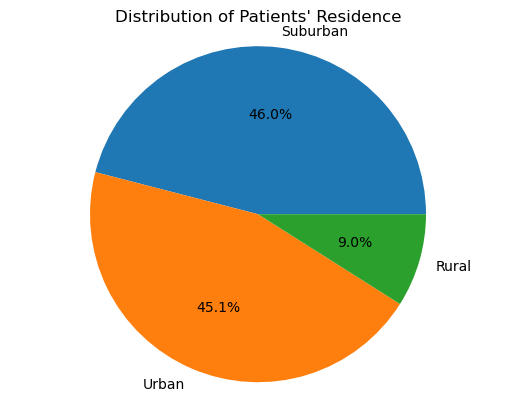

In [24]:
# Create a pie chart for the patients living in urban, suburban, and rural
residence_counts = US_residence_df_clean['urban_rural'].value_counts()
plt.pie(residence_counts, labels=residence_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution of Patients' Residence")
plt.show()

In [38]:
# Site types reported to have the cases

urban_site_type = US_residence_df_clean.loc[US_residence_df_clean['urban_rural'] == 'Urban']['der_site_type']
suburban_site_type = US_residence_df_clean.loc[US_residence_df_clean['urban_rural'] == 'Suburban']['der_site_type']
rural_site_type = US_residence_df_clean.loc[US_residence_df_clean['urban_rural'] == 'Rural']['der_site_type']

x_axis = np.arange(0, len(urban_site_type.unique()))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

array([0, 1, 2])